# 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 1: 데이터 전처리

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [251]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [254]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [257]:
# 한글 표시를 위한 라이브러리 설치
#!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [260]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기


#### 1) 데이터 불러오기

In [264]:
# 파일 불러오기
apart = pd.read_excel(path+'train.xlsx')

#### 2) 기본 정보 조회

In [267]:
#데이터 탐색
apart.head()

,단지코드,단지명,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,단지내주차면수,전용면적,공용면적,임대보증금,임대료,실차량수
0,C0001,엘에이치 서초4단지,78,35,서울,20131204,계단식,개별가스난방,전체동 설치,120,51.89,19.2603,50758000,620370,109
1,C0001,엘에이치 서초4단지,78,43,서울,20131204,계단식,개별가스난방,전체동 설치,120,59.93,22.2446,63166000,665490,109
2,C0002,LH삼성아파트,35,26,서울,20130801,복도식,개별가스난방,전체동 설치,47,27.75,16.5375,63062000,458640,35
3,C0002,LH삼성아파트,35,9,서울,20130801,복도식,개별가스난방,전체동 설치,47,29.08,17.3302,63062000,481560,35
4,C0003,강남LH8단지,88,7,서울,20131023,계단식,개별가스난방,전체동 설치,106,59.47,21.9462,72190000,586540,88


In [269]:
#데이터 분포
apart.describe()

,총세대수,전용면적별세대수,준공일자,단지내주차면수,전용면적,공용면적,임대보증금,임대료,실차량수
count,1157.000000,1157.000000,1.157000e+03,1157.000000,1157.000000,1157.000000,1.157000e+03,1.157000e+03,1157.000000
mean,659.075194,163.691443,2.008667e+07,682.261884,51.565584,20.562360,2.850789e+07,2.259409e+05,650.762316
std,456.110643,166.766358,6.777985e+04,473.331805,18.243315,5.164405,2.890687e+07,1.768102e+05,390.573462
min,1.000000,1.000000,1.992010e+07,10.000000,17.590000,5.850000,0.000000e+00,0.000000e+00,21.000000
25%,315.000000,44.000000,2.005031e+07,308.000000,39.480000,16.997400,1.379700e+07,1.177400e+05,320.000000
50%,595.000000,112.000000,2.010042e+07,629.000000,46.900000,20.384700,1.997300e+07,1.842900e+05,626.000000
75%,918.000000,229.000000,2.013121e+07,911.000000,59.810000,23.722500,3.375300e+07,2.634400e+05,894.000000
max,2289.000000,1258.000000,2.022071e+07,4553.000000,139.350000,42.760000,2.549220e+08,1.058030e+06,1657.000000


In [271]:
#데이터 정보
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      1157 non-null   object 
 1   단지명       1157 non-null   object 
 2   총세대수      1157 non-null   int64  
 3   전용면적별세대수  1157 non-null   int64  
 4   지역        1157 non-null   object 
 5   준공일자      1157 non-null   int64  
 6   건물형태      1135 non-null   object 
 7   난방방식      1082 non-null   object 
 8   승강기설치여부   1059 non-null   object 
 9   단지내주차면수   1157 non-null   int64  
 10  전용면적      1157 non-null   float64
 11  공용면적      1157 non-null   float64
 12  임대보증금     1157 non-null   int64  
 13  임대료       1157 non-null   int64  
 14  실차량수      1157 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 135.7+ KB


In [273]:
#상관관계 계수
apart.corr(numeric_only=True).style.background_gradient()

,총세대수,전용면적별세대수,준공일자,단지내주차면수,전용면적,공용면적,임대보증금,임대료,실차량수
총세대수,1.000000,0.486511,0.058568,0.615652,-0.206227,-0.016092,0.067881,0.078974,0.688783
전용면적별세대수,0.486511,1.000000,-0.052727,0.229355,-0.194478,-0.114391,-0.075221,-0.028003,0.294053
준공일자,0.058568,-0.052727,1.000000,0.307112,0.229243,0.319225,0.334364,0.363545,0.345515
단지내주차면수,0.615652,0.229355,0.307112,1.000000,0.302381,0.345131,0.305111,0.199081,0.890626
전용면적,-0.206227,-0.194478,0.229243,0.302381,1.000000,0.754058,0.553884,0.478109,0.314336
공용면적,-0.016092,-0.114391,0.319225,0.345131,0.754058,1.000000,0.516675,0.473151,0.349782
임대보증금,0.067881,-0.075221,0.334364,0.305111,0.553884,0.516675,1.000000,0.826746,0.350013
임대료,0.078974,-0.028003,0.363545,0.199081,0.478109,0.473151,0.826746,1.000000,0.325393
실차량수,0.688783,0.294053,0.345515,0.890626,0.314336,0.349782,0.350013,0.325393,1.000000


## 2. 데이터 전처리 ①


In [277]:
apart.isnull().sum()

단지코드         0
단지명          0
총세대수         0
전용면적별세대수     0
지역           0
준공일자         0
건물형태        22
난방방식        75
승강기설치여부     98
단지내주차면수      0
전용면적         0
공용면적         0
임대보증금        0
임대료          0
실차량수         0
dtype: int64

In [280]:
mode1=apart['건물형태'].mode()[0]
mode2=apart['난방방식'].mode()[0]
mode3=apart['승강기설치여부'].mode()[0]

In [282]:
mode1,mode2,mode3

('복도식', '개별가스난방', '전체동 설치')

In [284]:
apart['건물형태'].fillna(mode1,inplace=True)
apart['난방방식'].fillna(mode2,inplace=True)
apart['승강기설치여부'].fillna(mode3,inplace=True)

In [286]:
#결측치 제거 확인
apart.isna().sum()

단지코드        0
단지명         0
총세대수        0
전용면적별세대수    0
지역          0
준공일자        0
건물형태        0
난방방식        0
승강기설치여부     0
단지내주차면수     0
전용면적        0
공용면적        0
임대보증금       0
임대료         0
실차량수        0
dtype: int64

In [289]:
apart['준공연도']=apart['준공일자'].astype(str).str[0:4]
apart['준공연도']=apart['준공연도'].astype(int)

In [291]:
apart['총면적']=(apart['전용면적']+apart['공용면적'])*apart['전용면적별세대수']

In [293]:
apart.head()

,단지코드,단지명,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,단지내주차면수,전용면적,공용면적,임대보증금,임대료,실차량수,준공연도,총면적
0,C0001,엘에이치 서초4단지,78,35,서울,20131204,계단식,개별가스난방,전체동 설치,120,51.89,19.2603,50758000,620370,109,2013,2490.2605
1,C0001,엘에이치 서초4단지,78,43,서울,20131204,계단식,개별가스난방,전체동 설치,120,59.93,22.2446,63166000,665490,109,2013,3533.5078
2,C0002,LH삼성아파트,35,26,서울,20130801,복도식,개별가스난방,전체동 설치,47,27.75,16.5375,63062000,458640,35,2013,1151.4750
3,C0002,LH삼성아파트,35,9,서울,20130801,복도식,개별가스난방,전체동 설치,47,29.08,17.3302,63062000,481560,35,2013,417.6918
4,C0003,강남LH8단지,88,7,서울,20131023,계단식,개별가스난방,전체동 설치,106,59.47,21.9462,72190000,586540,88,2013,569.9134


In [296]:
#단지명 변수 제거
apart.drop(columns='단지명',inplace=True)
apart.drop(columns='단지내주차면수',inplace=True)
apart.drop(columns='준공일자',inplace=True)

In [248]:
#확인
apart.head()

,단지코드,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,전용면적,공용면적,임대보증금,임대료,실차량수,총면적
0,C0001,78,35,서울,20131204,계단식,개별가스난방,전체동 설치,51.89,19.2603,50758000,620370,109,2490.2605
1,C0001,78,43,서울,20131204,계단식,개별가스난방,전체동 설치,59.93,22.2446,63166000,665490,109,3533.5078
2,C0002,35,26,서울,20130801,복도식,개별가스난방,전체동 설치,27.75,16.5375,63062000,458640,35,1151.4750
3,C0002,35,9,서울,20130801,복도식,개별가스난방,전체동 설치,29.08,17.3302,63062000,481560,35,417.6918
4,C0003,88,7,서울,20131023,계단식,개별가스난방,전체동 설치,59.47,21.9462,72190000,586540,88,569.9134


## 3. 데이터 전처리 ②


In [314]:
data01=apart[['단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부', '실차량수']]
#중복 행 제거
data01.drop_duplicates(inplace=True)
#인덱스 초기화(기존 인덱스 제거)
data01.reset_index(drop=True,inplace=True)

In [320]:
# 중복행 제거 여부 확인
is_duplicated = data01.duplicated().any()
print(is_duplicated)

False


In [312]:
data02=apart[['단지코드', '총면적', '전용면적별세대수', '전용면적', '공용면적', '임대보증금', '임대료']]
data02.head()

,단지코드,총면적,전용면적별세대수,전용면적,공용면적,임대보증금,임대료
0,C0001,2490.2605,35,51.89,19.2603,50758000,620370
1,C0001,3533.5078,43,59.93,22.2446,63166000,665490
2,C0002,1151.4750,26,27.75,16.5375,63062000,458640
3,C0002,417.6918,9,29.08,17.3302,63062000,481560
4,C0003,569.9134,7,59.47,21.9462,72190000,586540


In [326]:
df_area=data02.groupby(['단지코드'],as_index=False)['총면적'].sum()

In [328]:
df_area.head()

,단지코드,총면적
0,C0001,6023.7683
1,C0002,1569.1668
2,C0003,7180.1396
3,C0004,47058.9273
4,C0006,543.0268


(array([ 90., 327., 382., 154.,  57., 132.,   5.,   1.,   6.,   3.]),
 array([ 17.59 ,  29.766,  41.942,  54.118,  66.294,  78.47 ,  90.646,
        102.822, 114.998, 127.174, 139.35 ]),
 <BarContainer object of 10 artists>)

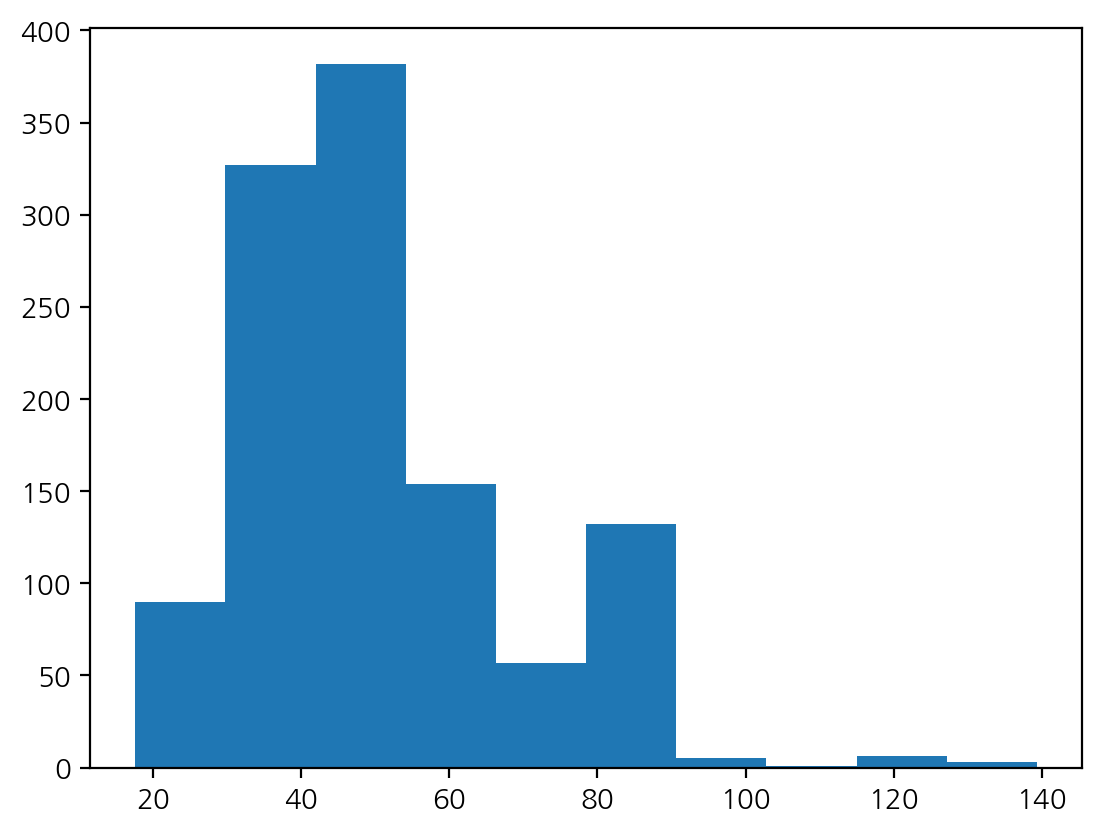

In [332]:
import matplotlib.pyplot as plt

# 박스플롯 그리기
plt.hist(apart['전용면적'])

In [355]:
# 전용면적 구간을 설정
bins = [10, 30, 40, 50, 60, 70, 80, 200]
labels = ['면적10-30', '면적30-40', '면적40-50', '면적50-60', '면적60-70', '면적70-80', '면적80-200']

In [357]:
# 전용면적 구간 변수 추가
data02['전용면적구간'] = pd.cut(data02['전용면적'], bins=bins, labels=labels, right=False)

In [359]:
data02.head()

,단지코드,총면적,전용면적별세대수,전용면적,공용면적,임대보증금,임대료,전용면적구간
0,C0001,2490.2605,35,51.89,19.2603,50758000,620370,면적50-60
1,C0001,3533.5078,43,59.93,22.2446,63166000,665490,면적50-60
2,C0002,1151.4750,26,27.75,16.5375,63062000,458640,면적10-30
3,C0002,417.6918,9,29.08,17.3302,63062000,481560,면적10-30
4,C0003,569.9134,7,59.47,21.9462,72190000,586540,면적50-60


In [362]:
temp=data02.groupby(['단지코드','전용면적구간'],as_index=False)['전용면적별세대수'].sum()
temp.head()

,단지코드,전용면적구간,전용면적별세대수
0,C0001,면적10-30,0
1,C0001,면적30-40,0
2,C0001,면적40-50,0
3,C0001,면적50-60,78
4,C0001,면적60-70,0


In [381]:
df_pivot=temp.pivot(index='단지코드',columns='전용면적구간',values='전용면적별세대수')
df_pivot.columns.name=None
#인덱스 초기화
df_pivot.reset_index(inplace=True)

In [383]:
df_pivot.head()

,단지코드,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-200
0,C0001,0,0,0,78,0,0,0
1,C0002,35,0,0,0,0,0,0
2,C0003,0,0,0,88,0,0,0
3,C0004,0,0,0,150,0,216,111
4,C0006,15,0,0,0,0,0,0


#### 3) 임대보증금, 임대료 평균 집계


In [371]:
df_rent=data02.groupby(['단지코드'],as_index=False)[['임대보증금','임대료']].mean()
df_rent.head()

,단지코드,임대보증금,임대료
0,C0001,5.696200e+07,642930.000000
1,C0002,6.306200e+07,470100.000000
2,C0003,7.219000e+07,586540.000000
3,C0004,1.015167e+08,950305.000000
4,C0006,5.522750e+07,340148.333333


### (3) 집계 결과 합치기

In [397]:
base_data=pd.merge(df_area,data01,how='left',on='단지코드')
base_data=pd.merge(base_data,df_pivot,how='left',on='단지코드')
base_data=pd.merge(base_data,df_rent,how='left',on='단지코드')

In [403]:
len(base_data.columns)

18

## 4. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data1.pkl로 합니다.

In [405]:
# 파일로 저장
joblib.dump(base_data, path+'base_data1.pkl')

['base_data1.pkl']